In [1]:

# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import pickle

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all test images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)
optimizer = Adam(learning_rate=0.0001)
emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.




C:\Users\JJ\AppData\Local\Temp\ipykernel_9884\1546278663.py:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/30


448/448 [==============================] - 313s 696ms/step - loss: 1.8002 - accuracy: 0.2614 - val_loss: 1.7166 - val_accuracy: 0.3318
Epoch 2/30
448/448 [==============================] - 52s 116ms/step - loss: 1.6417 - accuracy: 0.3593 - val_loss: 1.5594 - val_accuracy: 0.4110
Epoch 3/30
448/448 [==============================] - 51s 114ms/step - loss: 1.5406 - accuracy: 0.4073 - val_loss: 1.4697 - val_accuracy: 0.4421
Epoch 4/30
448/448 [==============================] - 52s 115ms/step - loss: 1.4635 - accuracy: 0.4378 - val_loss: 1.4044 - val_accuracy: 0.4753
Epoch 5/30
448/448 [==============================] - 152s 340ms/step - loss: 1.4002 - accuracy: 0.4668 - val_loss: 1.3513 - val_accuracy: 0.4854
Epoch 6/30
448/448 [==============================] - 106s 237ms/step - loss: 1.3453 - accuracy: 0.4891 - val_loss: 1.3089 - val_accuracy: 0.5039
Epoch 7/30
448/448 [==============================] - 51s 114ms/step - loss: 1.2997 - accuracy: 0.5076 - val_loss: 1.2816 - v

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Load the history object
with open('emotion_model_history_2.pkl', 'rb') as f:
    history = pickle.load(f)

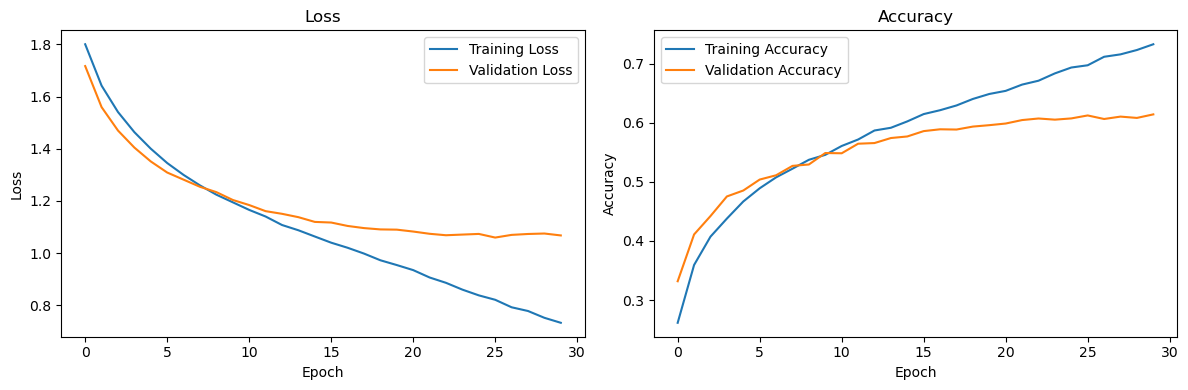

In [4]:
# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

perform regularization to prevent overfitting

In [5]:
from keras.regularizers import l2

# Initialize image data generator with rescaling
train_data_gen_1 = ImageDataGenerator(rescale=1./255)
validation_data_gen_1 = ImageDataGenerator(rescale=1./255)

# Preprocess all train images
train_generator_1 = train_data_gen_1.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all test images
validation_generator_1 = validation_data_gen_1.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# create model structure
emotion_model_1 = Sequential()

emotion_model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.001)))
emotion_model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_1.add(Dropout(0.25))

emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model_1.add(Dropout(0.25))

emotion_model_1.add(Flatten())
emotion_model_1.add(Dense(1024, activation='relu'))
emotion_model_1.add(Dropout(0.5))
emotion_model_1.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)
optimizer = Adam(learning_rate=0.0001)
emotion_model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the neural network/model
emotion_model_info_1 = emotion_model_1.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/50


C:\Users\JJ\AppData\Local\Temp\ipykernel_9884\1609235449.py:47: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info_1 = emotion_model_1.fit_generator(


448/448 [==============================] - 60s 132ms/step - loss: 1.9893 - accuracy: 0.2511 - val_loss: 1.9015 - val_accuracy: 0.2877
Epoch 2/50
448/448 [==============================] - 51s 114ms/step - loss: 1.7823 - accuracy: 0.3431 - val_loss: 1.6931 - val_accuracy: 0.4028
Epoch 3/50
448/448 [==============================] - 51s 114ms/step - loss: 1.6652 - accuracy: 0.3959 - val_loss: 1.6241 - val_accuracy: 0.4212
Epoch 4/50
448/448 [==============================] - 52s 117ms/step - loss: 1.5961 - accuracy: 0.4248 - val_loss: 1.5562 - val_accuracy: 0.4509
Epoch 5/50
448/448 [==============================] - 52s 115ms/step - loss: 1.5380 - accuracy: 0.4475 - val_loss: 1.4967 - val_accuracy: 0.4674
Epoch 6/50
448/448 [==============================] - 52s 116ms/step - loss: 1.4903 - accuracy: 0.4658 - val_loss: 1.4631 - val_accuracy: 0.4771
Epoch 7/50
448/448 [==============================] - 51s 115ms/step - loss: 1.4486 - accuracy: 0.4789 - val_loss: 1.4270 - val_accuracy: 0.4

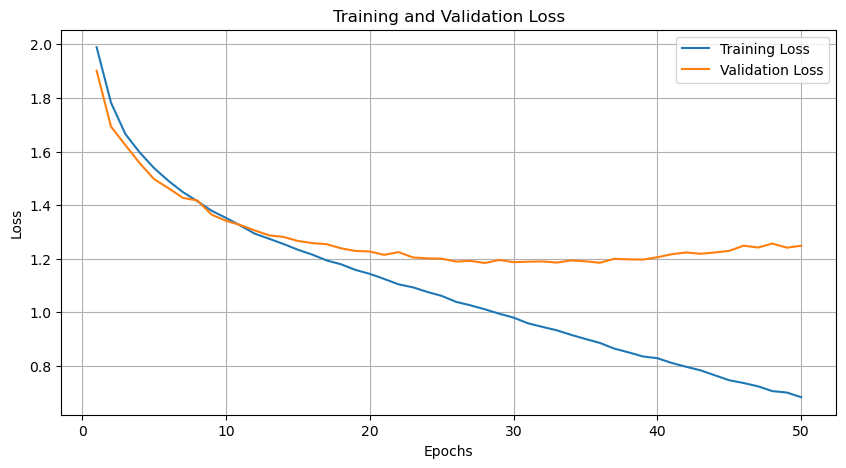

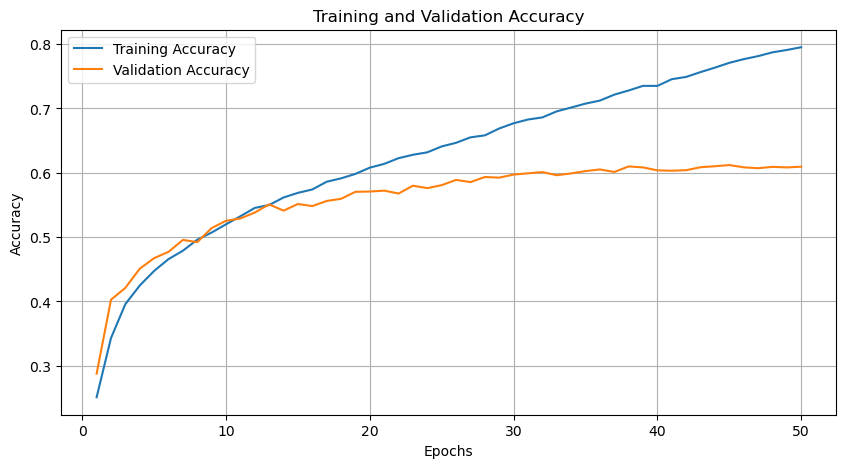

In [7]:
import matplotlib.pyplot as plt

# Get the training history
train_loss = emotion_model_info_1.history['loss']
train_accuracy = emotion_model_info_1.history['accuracy']
val_loss = emotion_model_info_1.history['val_loss']
val_accuracy = emotion_model_info_1.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()